# Імпортування нужних модулей

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.time import Time
from astroplan import Observer
from astropy.wcs import WCS
from astroplan.plots import dark_style_sheet, plot_sky
from astroplan import FixedTarget
import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
from matplotlib import cm, ticker
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Зчитування данних з FITS файлу спостереження, взятого з Mikulski Archive for Space Telescopes (MAST)

In [2]:
hdulist = fits.open('hst_14342_03_wfc3_uvis_f953n_drz.fits')
hdulist.info()

Filename: hst_14342_03_wfc3_uvis_f953n_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1257   ()      
  1  SCI           1 ImageHDU        88   (1343, 1306)   float32   
  2  WHT           1 ImageHDU        47   (1343, 1306)   float32   
  3  CTX           1 ImageHDU        42   (1343, 1306)   int32   
  4  HDRTAB        1 BinTableHDU    557   28R x 274C   [9A, 3A, J, D, D, D, D, D, D, D, D, D, D, D, D, J, 15A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, J, J, 8A, 23A, D, D, D, D, J, J, 8A, 23A, 9A, 18A, 1A, J, D, D, D, J, J, J, J, 23A, D, D, D, D, J, J, 4A, 3A, 4A, J, D, D, D, 23A, 1A, J, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, J, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, J, 5A, 4A, D, 13A, 8A, 4A, 3A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, J, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, J, J, J, J, D, 3A, J, D, 5A, 7A, D, D, D, D, D, D, D, D, D, D, D

# Параметри спостереження

In [3]:
hdu = hdulist['SCI']
header = hdu.header
data = hdu.data
header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1343                                                  
NAXIS2  =                 1306                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'icvd03g6q                         ' / rootname of the observation set
EXPNAME = 'icvd03g6q                ' / exposure identifier                     
BUNIT   = 'ELECTRONS/S'     

# Зображення спостереження

In [4]:
wcs_sirius = WCS(header)

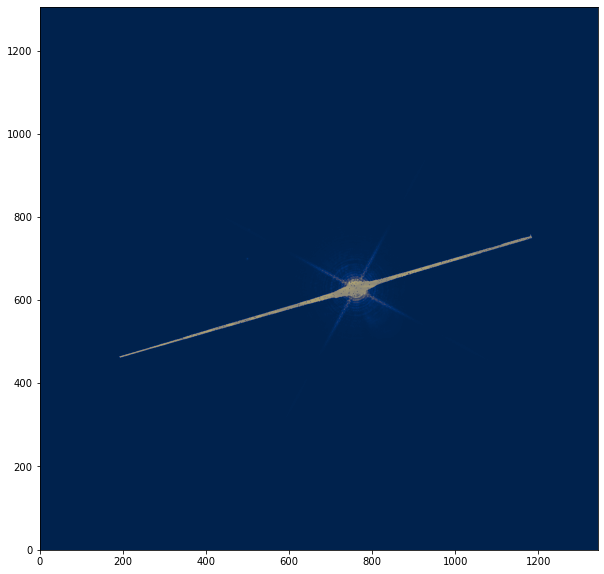

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(data, origin='lower', cmap='cividis')

# Накладання екваторіальних координат на спостереження

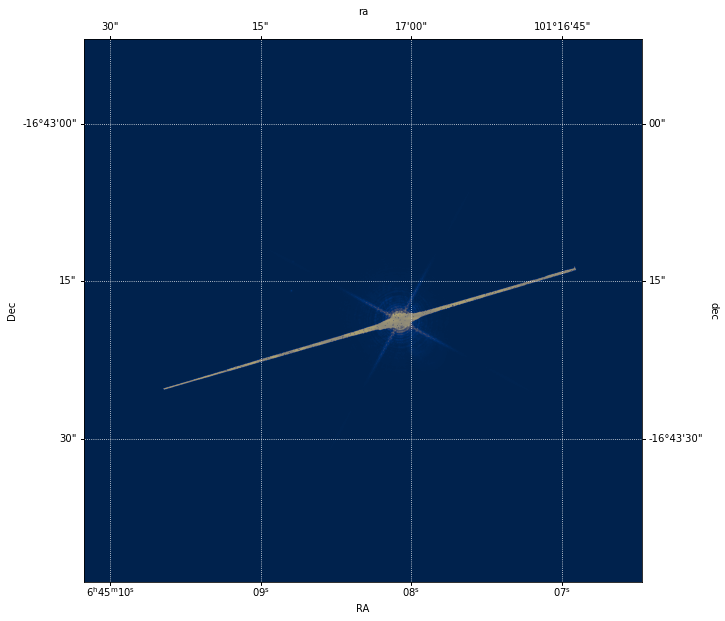

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_sirius)

plt.imshow(data, origin='lower', cmap='cividis', aspect='equal')
plt.xlim()
plt.ylim()
plt.xlabel('RA')
plt.ylabel('Dec')

overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')


# Виводимо гістограмму для знаходження розподілу значень

11302.562
-2.251429


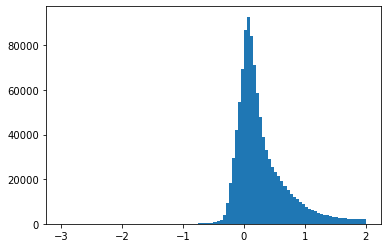

In [7]:
print(hdu.data.max())
print(hdu.data.min())
plt.hist(np.log10(hdu.data.flatten()), range=(-3, 2), bins=100);

## Розмір зображення (в пікселях)

In [8]:
hdu.data.shape

(1306, 1343)

# Масштабуємо зображення відвовідно до центральних значень розподілу

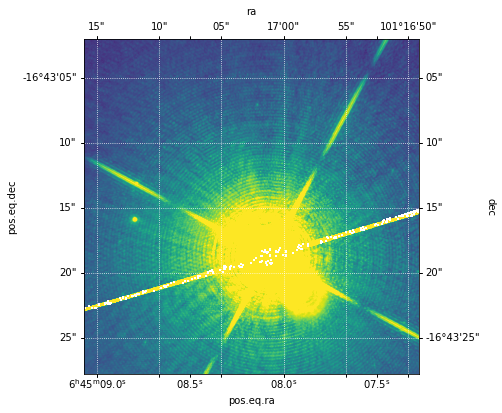

In [9]:
fig = plt.figure(figsize=(6,12))
ax = plt.subplot(projection=wcs_sirius)
ax.set_xlim(400, 1050)
ax.set_ylim(400, 1050)
ax.set_xticklabels('RA')
ax.set_yticklabels('DEC')
ax.imshow(np.log10(hdu.data+1E-4), vmin=-0.5 , vmax=2)
overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')

# Форматування у галактичні координати

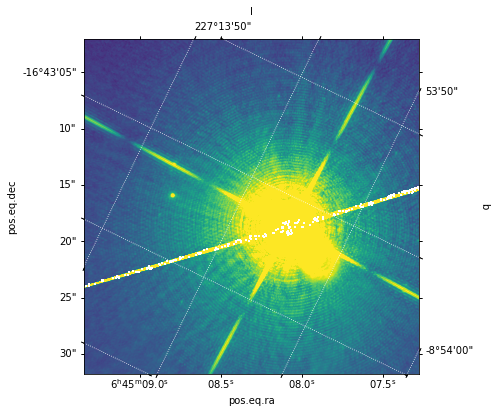

In [10]:
fig = plt.figure(figsize=(6,12))
ax = plt.subplot(projection=wcs_sirius)
ax.set_xlim(300, 1050)
ax.set_ylim(300, 1050)
ax.set_xticklabels('RA')
ax.set_yticklabels('DEC')
ax.imshow(np.log10(hdu.data+1E-4), vmin=-0.5 , vmax=2)

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='white', ls='dotted')

# Горизонтальні координати

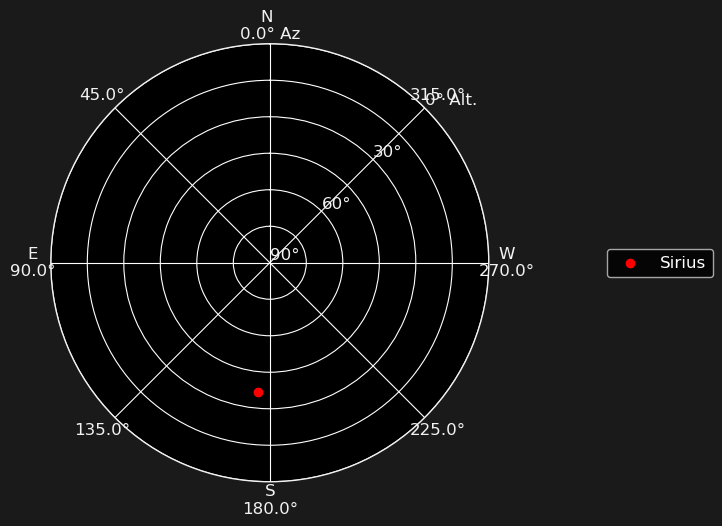

In [14]:
location = EarthLocation.from_geodetic(49.98081*u.deg, 36.25272*u.deg)
observer = Observer(location=location, name="Kharkiv", timezone="EST")
sirius_coords = SkyCoord(ra=header['RA_APER']*u.deg, dec=header['DEC_APER']*u.deg)
sirius = FixedTarget(coord=sirius_coords, name="Sirius")

observe_time = Time(['2020-10-31 00:30:00'])
plot_sky(sirius, observer, observe_time,style_sheet=dark_style_sheet, style_kwargs={'color':'red'})

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

# Траєкторія зірки Сіріус

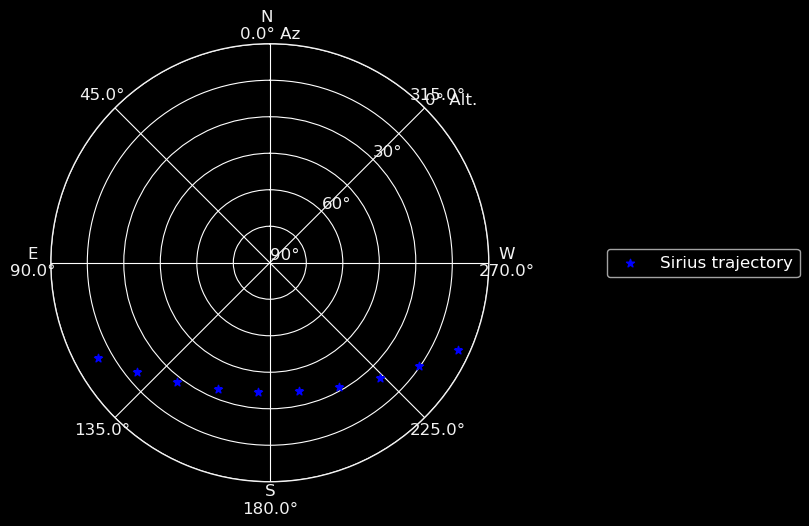

In [12]:
sirius = FixedTarget(coord=sirius_coords, name="Sirius trajectory")

observe_timeseries = observe_time + np.linspace(-4, 5, 10)*u.hour
plot_sky(sirius, observer, observe_timeseries,style_sheet=dark_style_sheet, style_kwargs={'color':'blue', 'marker':'*'})

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

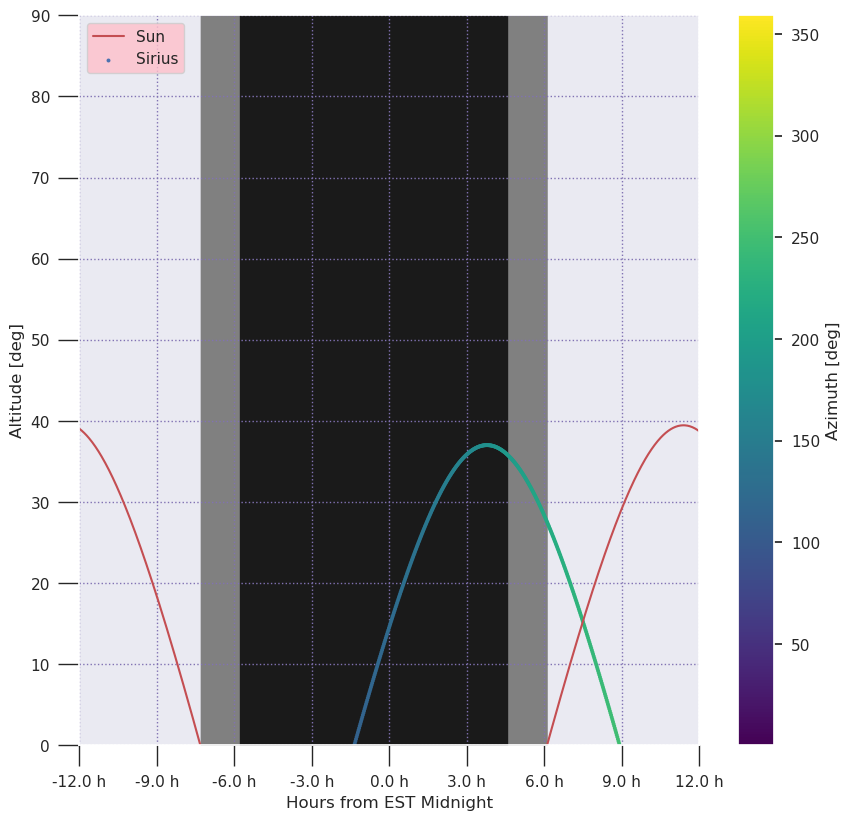

In [13]:
sns.set()

fig, ax = plt.subplots(figsize=(10,10))

utcoffset = +3*u.hour 
observe_time = Time('2020-10-31 00:00:00') -  utcoffset
t_delta = np.linspace(-12, 12, 1000)*u.hour
observe_timeseries = observe_time + t_delta
altaz_frame = AltAz(obstime=observe_timeseries,location=location)
sframe = sirius_coords.transform_to(altaz_frame)
sun_frame = get_sun(observe_timeseries).transform_to(altaz_frame)



ax.plot(t_delta, sun_frame.alt, color='r', label='Sun')

ax.scatter(t_delta, sframe.alt, c=(sframe.az/u.deg), label='Sirius', lw=0, s=8,
            cmap='viridis')
ax.fill_between(t_delta, 0*u.deg, 90*u.deg,
                 sun_frame.alt < -0*u.deg, color='0.5', zorder=0)
ax.fill_between(t_delta, 0*u.deg, 90*u.deg,
                 sun_frame.alt < -18*u.deg, color='k', zorder=0)

fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=mpl.colors.Normalize(vmin=min(sframe.az)/u.deg,vmax=max(sframe.az)/u.deg))).set_label('Azimuth [deg]')

ax.grid(color='m', ls='dotted')
ax.legend(loc='upper left', facecolor='pink')

ax.set_xlim(-12, 12)
ax.set_ylim(0,90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3.00))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(which='major',axis='x', width=1.00, length=15)
ax.tick_params(which='major',axis='y', width=1.00, length=15)
ax.xaxis.set_major_formatter(lambda x, pos: x*u.hour)
ax.set_xlabel('Hours from EST Midnight')
ax.set_ylabel('Altitude [deg]')
plt.show()